<a href="https://colab.research.google.com/github/avikumart/LLM-GenAI-Transformers-Notebooks/blob/main/DeepLearningFiles/Thyroid_Cancer_Risk_Dataset_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mzohaibzeeshan_thyroid_cancer_risk_dataset_path = kagglehub.dataset_download('mzohaibzeeshan/thyroid-cancer-risk-dataset')

print('Data source import complete.')


100%|██████████| 3.70M/3.70M [00:00<00:00, 68.5MB/s]

Extracting files...


Data source import complete.


In [10]:
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [5]:
!unzip thyroid-cancer-risk-dataset.zip -d thyroid-cancer-risk-dataset

unzip:  cannot find or open thyroid-cancer-risk-dataset.zip, thyroid-cancer-risk-dataset.zip.zip or thyroid-cancer-risk-dataset.zip.ZIP.


In [12]:
data = pd.read_csv(os.path.join(mzohaibzeeshan_thyroid_cancer_risk_dataset_path, 'thyroid_cancer_risk_data.csv'))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [ ]:
data.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


In [ ]:
data.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [ ]:
# Check missing value
data.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

# Preprocessing

In [ ]:
# Drop unnecessary columns
columns_to_drop = ['Patient_ID', 'Country', 'Ethnicity']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity', 'Diabetes', 'Thyroid_Cancer_Risk', 'Diagnosis']

In [ ]:
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
# Define features and target
X = data.drop(columns=['Diagnosis']).values
y = data['Diagnosis'].values

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [ ]:
# Create DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define Model

**1. Deep Learning using keras**

In [ ]:
# create the tensorflow model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # softmax for multi-class

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


4254/4254 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7699 - loss: 0.0000e+00 - val_accuracy: 0.7658 - val_loss: 0.0000e+00
Epoch 2/50
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7677 - loss: 0.0000e+00 - val_accuracy: 0.7658 - val_loss: 0.0000e+00
Epoch 3/50
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7693 - loss: 0.0000e+00 - val_accuracy: 0.7658 - val_loss: 0.0000e+00
Epoch 4/50
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7651 - loss: 0.0000e+00 - val_accuracy: 0.7658 - val_loss: 0.0000e+00
Epoch 5/50
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7687 - loss: 0.0000e+00 - val_accuracy: 0.7658 - val_loss: 0.0000e+00
Epoch 6/50
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7684 - loss: 0.0000e+00 - val_accuracy: 0.7658 - val_loss: 0.0000e+00
Epoch 7/50
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7678 - loss: 0.0000e+00 - val_accuracy: 0.7658 - val_loss: 0.0000e+00
Epoch 8/50
4254/4254 ━━━━━━━━━━━━━━━━━━━━ 7s 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 76.67%


**2. Deep Learning model using pytorch**

In [ ]:
# Define Neural Network Model
class ANNModel(nn.Module):
    def __init__(self, input_size):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # Binary classification (Benign/Malignant)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return self.softmax(x)

In [ ]:
# Initialize model
input_size = X_train.shape[1]
model = ANNModel(input_size)

In [ ]:
# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training

In [ ]:
# Train the model
epochs = 20
losses = []
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    losses.append(epoch_loss / len(train_loader))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 0.4877
Epoch 2/20, Loss: 0.4851
Epoch 3/20, Loss: 0.4851
Epoch 4/20, Loss: 0.4850
Epoch 5/20, Loss: 0.4850
Epoch 6/20, Loss: 0.4849
Epoch 7/20, Loss: 0.4849
Epoch 8/20, Loss: 0.4848
Epoch 9/20, Loss: 0.4848
Epoch 10/20, Loss: 0.4848
Epoch 11/20, Loss: 0.4848
Epoch 12/20, Loss: 0.4847
Epoch 13/20, Loss: 0.4846
Epoch 14/20, Loss: 0.4846
Epoch 15/20, Loss: 0.4846
Epoch 16/20, Loss: 0.4845
Epoch 17/20, Loss: 0.4845
Epoch 18/20, Loss: 0.4844
Epoch 19/20, Loss: 0.4844
Epoch 20/20, Loss: 0.4843


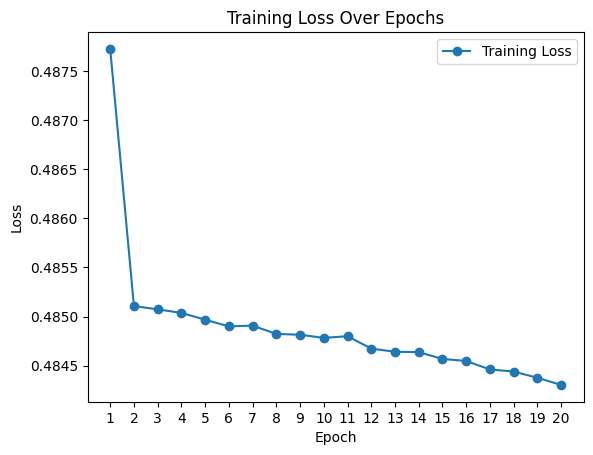

In [ ]:
# Plot training loss
plt.figure()
plt.plot(range(1, 21), losses, marker='o', label='Training Loss')
plt.xticks(range(1, 21))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
# plt.grid(True)
plt.show()

# Evaluate Model

In [ ]:
# Evaluate model
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Classification Report & Confusion Matrix

In [ ]:
# Classification Report
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant']))

Classification Report:
              precision    recall  f1-score   support

      Benign       0.85      0.94      0.89     32615
   Malignant       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539



<Figure size 640x480 with 0 Axes>

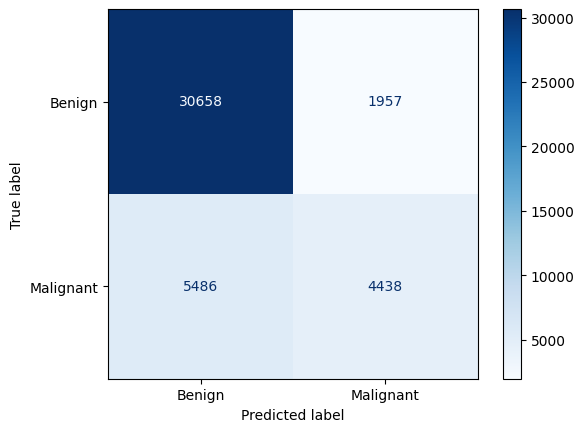

In [ ]:
# Confusion Matrix
plt.figure()
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues')
plt.show()

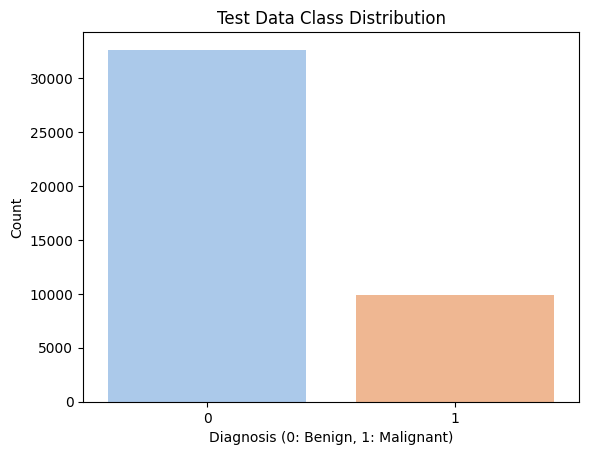

In [ ]:
# Visualize Class Distribution with Seaborn
plt.figure()
sns.countplot(x=pd.Series(y_true), palette='pastel')
plt.title('Test Data Class Distribution')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.show()